<a href="https://colab.research.google.com/github/Saikiran-Erukonda/Drug-Labels-Side-Effects-Analysis--A-ML-Approach/blob/main/Pharma_Drugs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pharma Drugs & Their Side Effects Analysis - A Machine Learning Approach**

## About Dataset

> The comprehensive pharmaceutical synthetic dataset contains **1,393 records** of synthetic drug information with **15 columns**

source : [Kaggle/datasets](https://www.kaggle.com/datasets/pratyushpuri/drug-labels-and-side-effects-dataset-1400-records/data)


 `realistic_drug_labels_side_effects.csv`


|Data Types | Domain  |Use_Case|
|----------|------------|-------|
|Mixed (intentional for data cleaning practice)|Pharmaceutical/Healthcare|ML Training, Data Analysis, Healthcare Research|


### Column Specifications

> Categorical Features

|Column Name	|Data Type	|Unique Values	|Description	|Example Values|
|------------|-----------|----------|-----------|----------|
|`drug_name`	|Object|	1,283 unique|	Pharmaceutical drug names with realistic naming patterns	|"Loxozepam32", "Amoxparin43", "Virazepam10"|
|`manufacturer`|	Object|	10 unique	|Major pharmaceutical companies	|Pfizer Inc., AstraZeneca, Johnson & Johnson|
|`drug_class`	|Object	|10 unique	|Therapeutic drug classifications|	Antibiotic, Analgesic, Antidepressant, Vaccine|
|`indications`	|Object|	10 unique	|Medical conditions the drug treats|	"Pain relief", "Bacterial infections", "Depression treatment"|
|`side_effects`|	Object|	434 unique|	Combination of side effects (1-3 per drug)|	"Nausea, Dizziness", "Headache, Fatigue, Rash"|
|`administration_route`|	Object	|7 unique|	Method of drug delivery|	Oral, Intravenous, Topical, Inhalation, Sublingual|
|`contraindications`|	Object	|10 unique	|Medical warnings for drug usage|	"Pregnancy", "Heart disease", "Liver disease"|
|`warnings`|	Object	|10 unique|	Safety instructions and precautions	|"Take with food", "Avoid alcohol", "Monitor blood pressure"|
|`batch_number`|	Object|	1,393 unique|	Manufacturing batch identifiers|	"xr691zv", "Ye266vU", "Rm082yX"|
|`expiry_date`|	Object	|782 unique|	Drug expiration dates| (YYYY-MM-DD)	"2025-12-13", "2027-03-09", "2026-10-06"|
|`side_effect_severity`|	Object|	3 unique	|Severity classification|	Mild, Moderate, Severe|
|`approval_status`|	Object|	3 unique	|Regulatory approval status|	Approved, Pending, Rejected|


 > Numerical Features

|Column Name	|Data Type|	Range	|Mean|	Std Dev|	Description|
|------------|-----------|----------|-----------|----------|---|
|`approval_year`|	Float/String|	1990-2024|	2006.7|	10.0|	FDA/regulatory approval year|
|`dosage_mg`	|Float/String	|10-990 mg|	499.7	|290.0|	Medication strength in milligrams|
|`price_usd`|	Float/String	| $2.32 - $499.24 |	 $251.12 |	$144.81 |	Drug price in US dollars|

**Key statistics :**
- Manufacturer Distribution
  
   |Manufacturer	|Count|	Percentage|
   |--------------|----|--|
   |Pfizer Inc.|	170|	12.2%|
   |AstraZeneca|	~140|	~10.0%|
   |Merck & Co.|	~140	|~10.0%|
   |Johnson & Johnson	|~140	|~10.0%|
   |GlaxoSmithKline	|~140|	~10.0%|
   |Others|	~623	|~44.8%|

- Drug Class Distribution
  
   |Drug Class	|Count	|Most Common|
   |-------|--|--|
   |Anti-inflammatory	|154	|✓|
   |Antibiotic	|~140	||
   |Antidepressant|	~140	||
   |Antiviral|	~140	||
   |Vaccine|	~140	||
   |Others|	~679||

- Side Effect Severity
  
   |Severity|	Count|	Percentage|
   |----------|---|---|
   |Severe	|488	|35.0%|
   |Moderate	|~453|	~32.5%|
   |Mild|	~452	|~32.5%|

In [ ]:
# import necessary libraries
"""EDA purpose"""
import pandas as pd
import numpy as np
from numpy import random

%matplotlib inline
import matplotlib as mpl #data_visualization
import matplotlib.pyplot as plt
import seaborn as sns
print(plt.style.available)
mpl.style.use(['ggplot'])

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
file_path = "/content/drive/MyDrive/Projects/Pharma_drugs_analysis/realistic_drug_labels_side_effects.csv"

pharma_data = pd.read_csv(file_path)
pharma_data.head()

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_date,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026-11-29,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027-07-14,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028-06-02,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026-07-07,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027-12-28,Moderate,Pending


## Data Cleaning

In [ ]:
print(pharma_data.info())
print(pharma_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   drug_name             1436 non-null   object 
 1   manufacturer          1436 non-null   object 
 2   approval_year         1436 non-null   int64  
 3   drug_class            1436 non-null   object 
 4   indications           1436 non-null   object 
 5   side_effects          1436 non-null   object 
 6   dosage_mg             1436 non-null   int64  
 7   administration_route  1436 non-null   object 
 8   contraindications     1436 non-null   object 
 9   warnings              1436 non-null   object 
 10  price_usd             1436 non-null   float64
 11  batch_number          1436 non-null   object 
 12  expiry_date           1436 non-null   object 
 13  side_effect_severity  1436 non-null   object 
 14  approval_status       1436 non-null   object 
dtypes: float64(1), int64(

 > Numerical Features

|Column Name	|Data Type|	Range	|Mean|	Std Dev|	Description|
|------------|-----------|----------|-----------|----------|---|
|`approval_year`|	Float/String|	1990-2024|	2006.7|	10.0|	FDA/regulatory approval year|
|`dosage_mg`	|Float/String	|10-990 mg|	499.7	|290.0|	Medication strength in milligrams|
|`price_usd`(in $)| Float/String | 2.32 - 499.24 |251.12 |144.81| price in US dollars|


Convert datatype of `expiry_date` column to date

In [ ]:
pharma_data['expiry_date']= pd.to_datetime(pharma_data['expiry_date']).dt.year
pharma_data.rename(columns={'expiry_date':'expiry_year'},inplace=True)
pharma_data['expiry_year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1436 entries, 0 to 1435
Series name: expiry_year
Non-Null Count  Dtype
--------------  -----
1436 non-null   int32
dtypes: int32(1)
memory usage: 5.7 KB


In [ ]:
# in each column, how many unique values are there
print(pharma_data.nunique())
print(pharma_data.columns)

drug_name               1337
manufacturer              10
approval_year             35
drug_class                10
indications               10
side_effects             435
dosage_mg                 99
administration_route       7
contraindications         10
warnings                  10
price_usd               1415
batch_number            1436
expiry_year                4
side_effect_severity       3
approval_status            3
dtype: int64
Index(['drug_name', 'manufacturer', 'approval_year', 'drug_class',
       'indications', 'side_effects', 'dosage_mg', 'administration_route',
       'contraindications', 'warnings', 'price_usd', 'batch_number',
       'expiry_year', 'side_effect_severity', 'approval_status'],
      dtype='object')


In [ ]:
pharma_data.sample(5)

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_year,side_effect_severity,approval_status
934,Rivastatin59,Roche Holding AG,1991,Analgesic,Inflammation reduction,"Diarrhea, Insomnia",110,Sublingual,Liver disease,Monitor blood pressure,450.98,Gv897YY,2027,Mild,Rejected
303,Daxozepam71,Merck & Co.,2022,Antihistamine,Allergy relief,"Headache, Blurred vision, Nausea",370,Rectal,Heart disease,Avoid sunlight exposure,189.04,Er138uV,2027,Severe,Approved
1170,Viraprofen97,Merck & Co.,2017,Antibiotic,Inflammation reduction,Insomnia,90,Rectal,Seizures,Do not discontinue abruptly,353.12,mg093GN,2027,Moderate,Rejected
914,Mecoparin90,Johnson & Johnson,2016,Antipyretic,Allergy relief,Headache,840,Sublingual,Allergic reaction,Take with food,432.33,eF283RA,2028,Severe,Rejected
1118,Cefprofen77,Johnson & Johnson,1994,Antipyretic,Pain relief,Headache,880,Oral,Allergic reaction,Use with caution in elderly,408.46,jN868kk,2026,Mild,Approved


Let's see distribution of numerical columns as Histogram

Drugs launched over years distribution 


<Axes: xlabel='approval_year', ylabel='Count'>

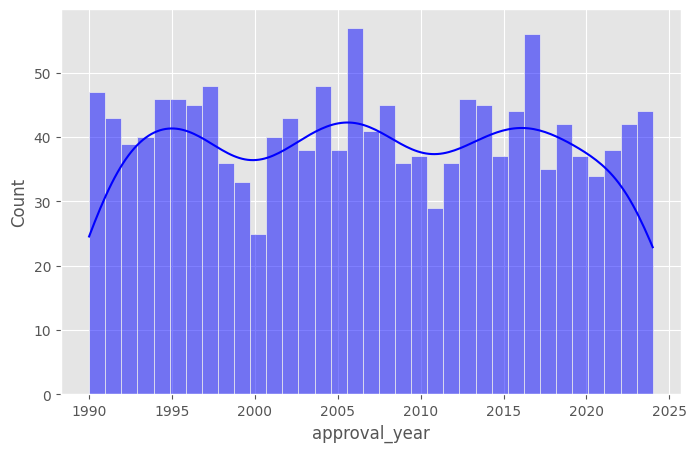

In [ ]:
print("Drugs launched over years distribution ")
plt.figure(figsize=(8,5))
sns.histplot(pharma_data["approval_year"],bins=35,kde=True,alpha=0.5,color ="blue" )

Distribution of Dosage(in mg) & Price(in USD)


<Axes: ylabel='Count'>

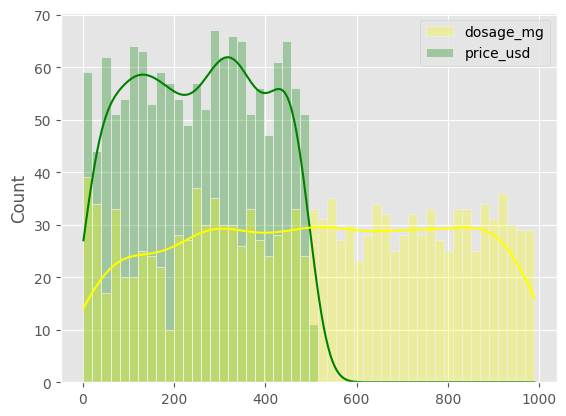

In [ ]:
print("Distribution of Dosage(in mg) & Price(in USD)")
sns.histplot([pharma_data["dosage_mg"],pharma_data["price_usd"]],bins=50,kde=True,alpha=0.3,palette=["yellow","green"])

<Axes: xlabel='approval_year', ylabel='Count'>

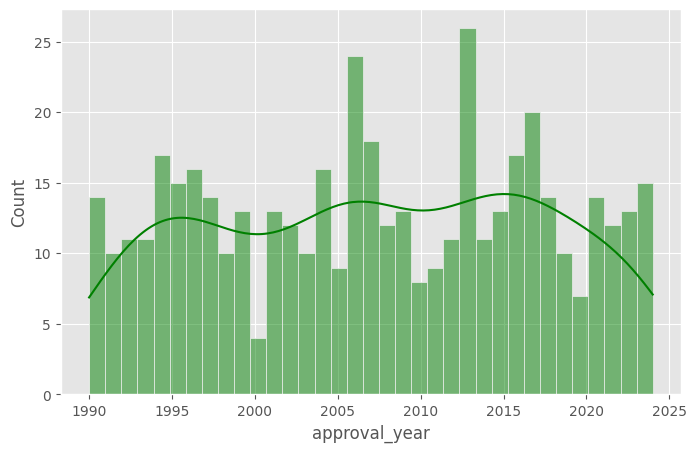

In [ ]:
plt.figure(figsize=(8,5))

approved_drugs = pharma_data[pharma_data['approval_status'] == 'Approved']

# Plot histogram of approval years
sns.histplot(approved_drugs["approval_year"], bins=35, kde=True, alpha=0.5, color="green")

In [ ]:
rejected_drugs = pharma_data[pharma_data['approval_status']=='Rejected']
print(rejected_drugs.shape)
rejected_drugs.head()

(478, 15)


,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_year,side_effect_severity,approval_status
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026,Mild,Rejected
5,Loxocillin72,Johnson & Johnson,2023,Antifungal,Viral infections,"Rash, Dizziness",180,Intravenous,Bleeding disorders,May affect fertility,463.28,Nl465Ez,2025,Moderate,Rejected
10,Fenocillin43,AstraZeneca,1994,Antiviral,Allergy relief,"Dizziness, Fatigue",860,Oral,Liver disease,Risk of addiction,99.56,FP064JV,2028,Severe,Rejected
14,Virazole50,Johnson & Johnson,2020,Antipyretic,Viral infections,"Headache, Dizziness, Constipation",10,Topical,Seizures,May cause drowsiness,412.56,vP121pU,2028,Severe,Rejected
16,Cefzole42,GlaxoSmithKline,1996,Antidepressant,Pain relief,Blurred vision,770,Rectal,Asthma,Take with food,85.40,JW654ck,2027,Severe,Rejected


In [ ]:
print(approved_drugs.shape,pharma_data.shape,rejected_drugs.shape,end="\n")

(462, 15) (1436, 15) (478, 15)


In [ ]:
app_severity_effect= approved_drugs.groupby('side_effect_severity',as_index=False)['batch_number'].count()
app_severity_effect.rename(columns= {'batch_number':'count'},inplace=True)
print(app_severity_effect)

rej_severity_effect = rejected_drugs.groupby('side_effect_severity',as_index=False)['batch_number'].count()
rej_severity_effect.rename(columns= {'batch_number':'count'},inplace=True)
print(rej_severity_effect)

total_severity = pharma_data.groupby(['side_effect_severity','approval_status'],as_index=True)['batch_number'].count() #it forms a series
#total_severity.rename(columns= {'batch_number':'count'},inplace=True) need to convert as dataframe to rename column
total_severity.name = 'count'  #directly we can rename the Series
total_severity=pd.DataFrame(total_severity)
total_severity

  side_effect_severity  count
0                 Mild    175
1             Moderate    147
2               Severe    140
  side_effect_severity  count
0                 Mild    158
1             Moderate    170
2               Severe    150


count
side_effect_severity approval_status       
Mild                 Approved           175
                     Pending            157
                     Rejected           158
Moderate             Approved           147
                     Pending            165
                     Rejected           170
Severe               Approved           140
                     Pending            174
                     Rejected           150

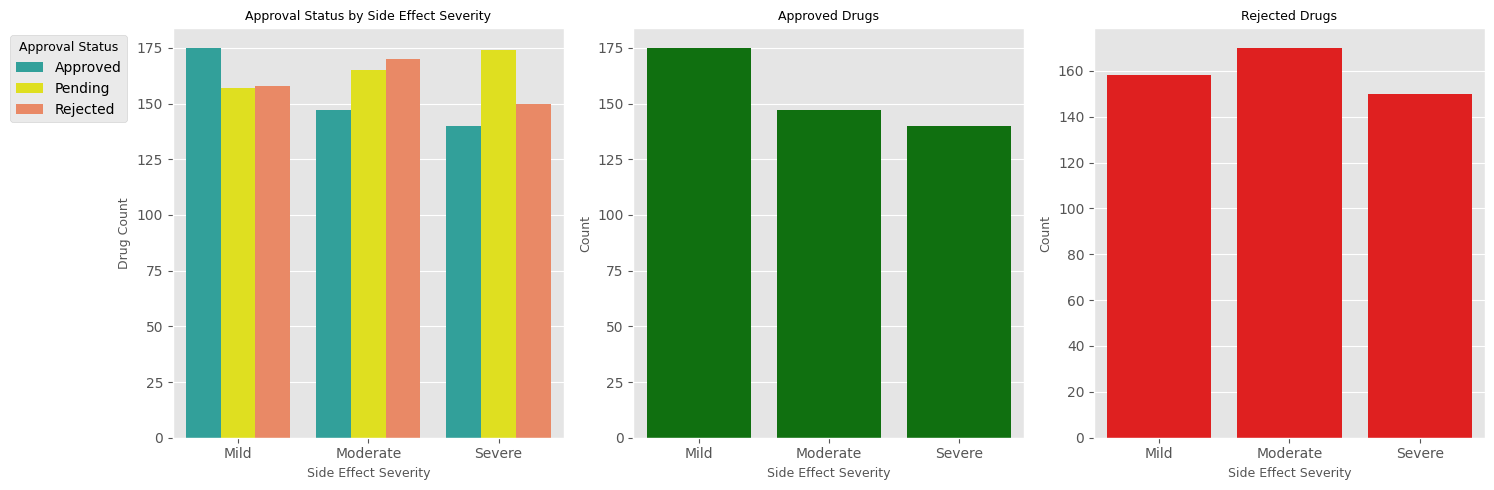

In [ ]:
fig = plt.figure(figsize=(15,5))
p0 = fig.add_subplot(1,3,1)
p1= fig.add_subplot(1,3,2)
p2 = fig.add_subplot(1,3,3)

sns.barplot(x ='side_effect_severity',y ='count',data=total_severity.reset_index(),
            hue='approval_status',palette=["lightseagreen",'yellow','coral'],ax=p0)
p0.set_title("Approval Status by Side Effect Severity", fontsize=9)
p0.set_xlabel("Side Effect Severity", fontsize=9)
p0.set_ylabel("Drug Count", fontsize=9)
p0.legend(title="Approval Status", title_fontsize=9, fontsize=10,
          loc='upper right',bbox_to_anchor=(-0.1,1)
)

sns.barplot(x='side_effect_severity',y='count',data=app_severity_effect,color='green',ax=p1)
p1.set_title("Approved Drugs", fontsize=9)
p1.set_xlabel("Side Effect Severity", fontsize=9)
p1.set_ylabel("Count", fontsize=9)


sns.barplot(x='side_effect_severity',y='count',data=rej_severity_effect,color='red',ax=p2)
p2.set_title("Rejected Drugs", fontsize=9)
p2.set_xlabel("Side Effect Severity", fontsize=9)
p2.set_ylabel("Count", fontsize=9)

plt.tight_layout()

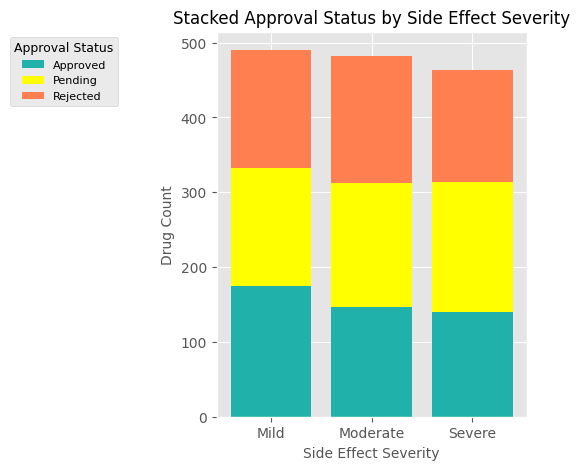

In [ ]:
# @title
pivot_df = total_severity.reset_index().pivot(
    index='side_effect_severity',
    columns='approval_status',
    values='count'
).fillna(0)


colors = ['lightseagreen', 'yellow', 'coral']
labels = pivot_df.columns.tolist()

fig, ax = plt.subplots(figsize=(4, 5))

bottom = np.zeros(len(pivot_df))

for i, label in enumerate(labels):
    ax.bar(
        pivot_df.index,
        pivot_df[label],
        bottom=bottom,
        label=label,
        color=colors[i]
    )
    bottom += pivot_df[label]

# Add labels and legend
ax.set_title("Stacked Approval Status by Side Effect Severity", fontsize=12)
ax.set_xlabel("Side Effect Severity", fontsize=10)
ax.set_ylabel("Drug Count", fontsize=10)
ax.legend(title="Approval Status", fontsize=8, title_fontsize=9,loc='upper right',bbox_to_anchor=(-0.3, 1))

### **Drug Approval Prediction:** Predict approval likelihood based on drug characteristics

Let's find the features which are helping the Drug to approve.

- Steps:

  + Perform EDA on approved_drugs | Data | rejected_drugs and compare them.

In [ ]:
pharma_data.columns

Index(['drug_name', 'manufacturer', 'approval_year', 'drug_class',
       'indications', 'side_effects', 'dosage_mg', 'administration_route',
       'contraindications', 'warnings', 'price_usd', 'batch_number',
       'expiry_year', 'side_effect_severity', 'approval_status'],
      dtype='object')

In [ ]:
select_columns = ['drug_name','manufacturer','approval_year', 'drug_class',
       'indications', 'side_effects', 'dosage_mg', 'administration_route',
       'contraindications', 'warnings','price_usd','expiry_year', 'side_effect_severity', 'approval_status']

#### Feature Ranking and Extraction

In [ ]:
features = pharma_data[select_columns].copy()
features.shape
feature_original =features.copy()

In [ ]:
features.nunique()

,0
drug_name,1337
manufacturer,10
approval_year,35
drug_class,10
indications,10
side_effects,435
dosage_mg,99
administration_route,7
contraindications,10
warnings,10


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

features.drop(columns=['approval_year','dosage_mg','price_usd','expiry_year'],inplace =True)
# ordinal_encoder = OrdinalEncoder()
# features_encoded = ordinal_encoder.fit_transform(features)

LE =LabelEncoder()
for feature in features.columns:
  features[feature]=LE.fit_transform(features[feature])



In [ ]:
# @title
numerical_df = feature_original[['approval_year','dosage_mg','price_usd','expiry_year']].copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_df[['approval_year', 'price_usd', 'dosage_mg','expiry_year']] = scaler.fit_transform(numerical_df[['approval_year', 'price_usd', 'dosage_mg','expiry_year']])

categorical_df = features.copy()

#Combine for ranking
full_features = pd.concat([numerical_df, categorical_df], axis=1)


In [ ]:
"""This method used in case of regression(continous target variable - numeric)"""

# corr_matrix2 = full_features.corr()
# feature_correlation2 = corr_matrix2['approval_status'].drop('approval_status')
# feature_correlation_table2 = feature_correlation2.abs().sort_values(ascending=False).reset_index()
# feature_correlation_table2.columns = ['Feature','Correlation with target']
# feature_correlation_table2  #feature ranking with numerical values


'This method used in case of regression(continous target variable - numeric)'

In [ ]:
# print([feature for feature in feature_correlation_table2['Feature']])

In [ ]:
# full_features.drop(columns=['administration_route', 'indications', 'contraindications'],inplace=True)

##### **Model based feature ranking**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = full_features.drop(columns=['drug_name','approval_status'], axis=1)
Y = full_features['approval_status']

x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(x_train,y_train)

importances = model.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_ranks)


price_usd               0.122947
side_effects            0.122699
dosage_mg               0.116240
approval_year           0.107774
drug_class              0.077645
contraindications       0.077536
manufacturer            0.077342
indications             0.075169
warnings                0.074250
administration_route    0.065322
expiry_year             0.045243
side_effect_severity    0.037833
dtype: float64


In [ ]:
pharma_data.head()

,drug_name,manufacturer,approval_year,drug_class,indications,side_effects,dosage_mg,administration_route,contraindications,warnings,price_usd,batch_number,expiry_year,side_effect_severity,approval_status
0,Seroxetine50,AstraZeneca,1996,Antidepressant,Allergy relief,"Fatigue, Nausea",260,Rectal,Bleeding disorders,Avoid alcohol,192.43,MV388Pl,2026,Mild,Pending
1,Mecoparin93,AstraZeneca,2018,Vaccine,Allergy relief,Nausea,470,Inhalation,Allergic reaction,Take with food,397.82,UR279ZN,2027,Mild,Approved
2,Daxozole89,Merck & Co.,1997,Antipsychotic,Allergy relief,"Diarrhea, Blurred vision, Dizziness",330,Sublingual,High blood pressure,Take with food,131.69,we040kH,2028,Moderate,Pending
3,Viracillin84,Roche Holding AG,2004,Antifungal,Inflammation reduction,"Fatigue, Dry mouth",450,Oral,Kidney impairment,Do not operate machinery,372.82,hO060rh,2026,Mild,Rejected
4,Amoxstatin62,Pfizer Inc.,2003,Antidepressant,Psychosis control,"Insomnia, Dry mouth, Fatigue",430,Topical,Bleeding disorders,Do not operate machinery,281.48,Fa621Sw,2027,Moderate,Pending


In [ ]:
full_features.head()

,approval_year,dosage_mg,price_usd,expiry_year,drug_name,manufacturer,drug_class,indications,side_effects,administration_route,contraindications,warnings,side_effect_severity,approval_status
0,-1.068530,-0.871892,-0.416680,-0.625413,1051,0,3,0,250,4,2,0,0,1
1,1.096074,-0.138440,1.023732,0.395147,739,0,9,0,353,0,0,8,0,0
2,-0.970139,-0.627408,-0.842653,1.415707,423,4,6,0,93,5,5,8,1,1
3,-0.281401,-0.208293,0.848406,-0.625413,1095,8,4,5,236,3,6,3,0,2
4,-0.379792,-0.278145,0.207833,0.395147,68,7,3,8,331,6,2,3,1,1


#### ***Train and Test the model***

##### Random Classifier Model -- verylow 27% accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

X = full_features.drop(columns=['drug_name','approval_status'], axis=1)
Y = full_features['approval_status']

x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Test dataset")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_train = model.predict(x_train)
print("\n--------------------------\nTraining Dataset")
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))



Test dataset
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.19      0.20        91
           1       0.32      0.28      0.30       105
           2       0.28      0.36      0.31        92

    accuracy                           0.27       288
   macro avg       0.27      0.27      0.27       288
weighted avg       0.27      0.27      0.27       288

Confusion Matrix:
 [[17 31 43]
 [34 29 42]
 [28 31 33]]

--------------------------
Training Dataset
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       371
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       386

    accuracy                           1.00      1148
   macro avg       1.00      1.00      1.00      1148
weighted avg       1.00      1.00      1.00      1148

Confusion Matrix:
 [[371   0   0]
 [  0 391   0]
 [  0   0 386]]


##### Decision Tree model 39% on test |78% train accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = full_features.drop(columns=['drug_name','approval_status','expiry_year'], axis=1)
Y = full_features['approval_status']

x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion ='gini',max_depth=10,random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Test dataset")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_train = model.predict(x_train)
print("\n--------------------------\nTraining Dataset")
print("Classification Report:\n", classification_report(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

Test dataset
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.53      0.46        91
           1       0.40      0.34      0.37       105
           2       0.33      0.29      0.31        92

    accuracy                           0.39       288
   macro avg       0.38      0.39      0.38       288
weighted avg       0.38      0.39      0.38       288

Confusion Matrix:
 [[48 21 22]
 [37 36 32]
 [31 34 27]]

--------------------------
Training Dataset
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       371
           1       0.76      0.79      0.77       391
           2       0.85      0.71      0.77       386

    accuracy                           0.78      1148
   macro avg       0.78      0.78      0.78      1148
weighted avg       0.78      0.78      0.78      1148

Confusion Matrix:
 [[307  38  26]
 [ 59 308  24]
 [ 50  61 275]]


It's a sign of **model Overfitting** by training dataset. We need to mitigate this by below steps:
1. Limit Tree Depth -> Random Forests can grow very deep trees by default. Restricting depth helps generalization:
    > model = RandomForestClassifier(max_depth=10, random_state=42)
2. Reduce Number of Trees -> Too many trees can memorize the training data:
     >model = RandomForestClassifier(n_estimators=100, random_state=42)
3. Control Leaf Size -> Force trees to split only when there's enough data:
    >model = RandomForestClassifier(min_samples_leaf=5, random_state=42)
4. Use Cross-Validation -> Instead of relying on a single train-test split:
    >from sklearn.model_selection import cross_val_score

    > scores = cross_val_score(model, X, Y, cv=5)

     > print("Cross-validated accuracy:", scores.mean())
5. Feature Selection
    - Drop low-importance features or use PCA to reduce dimensionality.
6. Check Class Imbalance : if target class is imbalance
     > model = RandomForestClassifier(class_weight='balanced', random_state=42)

------------------------------------------
Updated model_setup
``` python
model = RandomForestClassifier(
                     n_estimators=100,
                     max_depth=10,
                     min_samples_leaf=5,
                     class_weight='balanced',
                     random_state=42
                    )
model.fit(x_train, y_train)
```

#### New Approach:
 **Training set, Validation set, test set**

In [ ]:
from sklearn.neural_network import MLPClassifier


# First split: train + temp (validation + test)
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Second split: train + validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model = MLPClassifier(solver = 'sgd',
                      learning_rate = 'adaptive',
                      learning_rate_init = 0.01,
                      random_state=42,
                      max_iter = 500,
                      activation = 'relu',
                      hidden_layer_sizes=(64,32))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model.fit(X_train,y_train)

y_train_pred = model.predict(X_train)

y_pred_val = model.predict(X_val)

y_pred_test = model.predict(X_test)

print("Training dataset")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

print("\n--------------------------\nValidation Dataset")
print("Classification Report:\n", classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

print("\n--------------------------\nTest Dataset")
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Training dataset
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       293
           2       1.00      1.00      1.00       292

    accuracy                           1.00       861
   macro avg       1.00      1.00      1.00       861
weighted avg       1.00      1.00      1.00       861

Confusion Matrix:
 [[276   0   0]
 [  0 293   0]
 [  0   0 292]]

--------------------------
Validation Dataset
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.34      0.35        95
           1       0.34      0.39      0.36        98
           2       0.38      0.35      0.37        94

    accuracy                           0.36       287
   macro avg       0.36      0.36      0.36       287
weighted avg       0.36      0.36      0.36       287

Confusion Matrix:
 [[32 39 24]
 [31 38 29]
 [26 35 33]]

----

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### ----------------------------Try XGBoost or GradientBoostingClassifier---------------------------------------

#### **Success_rate by manufacturer**

In [ ]:
company_approval = pharma_data.groupby(['manufacturer','approval_status'],as_index=False)['batch_number'].count()

company_approval = pd.DataFrame(company_approval)
company_approval.rename(columns={'batch_number':'count'},inplace=True)

In [ ]:
pivot_df = company_approval.pivot(index='manufacturer', columns='approval_status', values='count').fillna(0)
pivot_df

pivot_df['Total']=pivot_df.sum(axis=1)
pivot_df['Success Rate (%)'] = (pivot_df['Approved'] / pivot_df['Total']) * 100
pivot_df['Success Rate (%)'] = pivot_df['Success Rate (%)'].round(2)
pivot_df.sort_values(by='Success Rate (%)',inplace=True)
pivot_df

approval_status,Approved,Pending,Rejected,Total,Success Rate (%)
manufacturer,,,,,
Novartis AG,42,49,53,144,29.17
Pfizer Inc.,40,40,56,136,29.41
Bayer AG,44,63,40,147,29.93
Roche Holding AG,42,50,45,137,30.66
GlaxoSmithKline,45,45,50,140,32.14
AstraZeneca,43,50,39,132,32.58
Sanofi,49,59,40,148,33.11
Merck & Co.,52,51,54,157,33.12
Johnson & Johnson,53,46,50,149,35.57


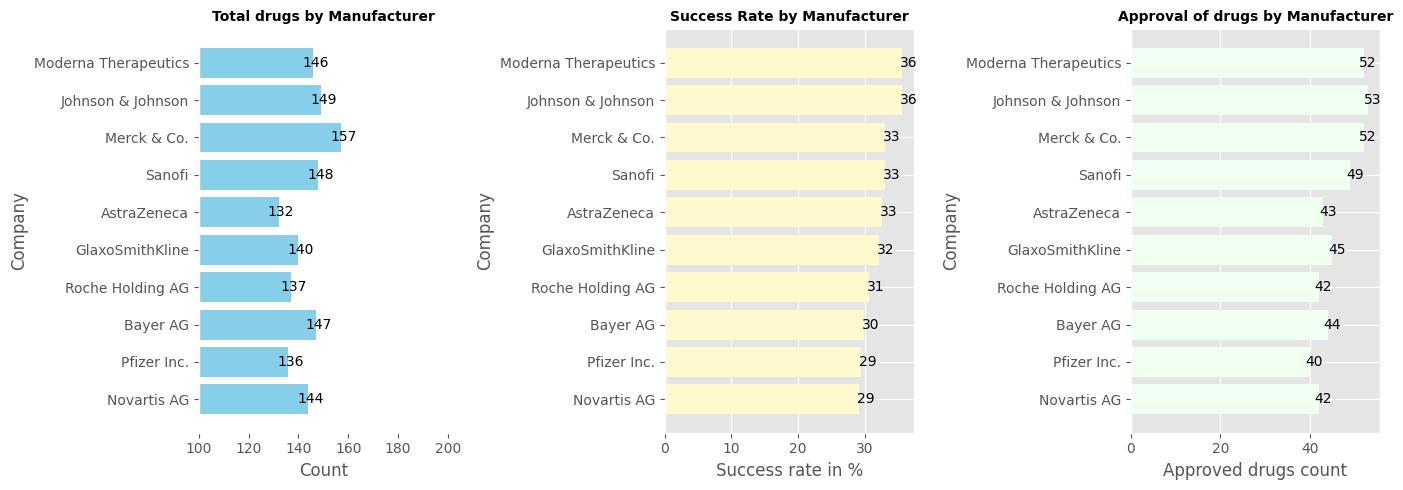

In [ ]:
fig = plt.figure(figsize=(14,5))
p0 = fig.add_subplot(1,3,1)
p1= fig.add_subplot(1,3,2)
p2 = fig.add_subplot(1,3,3)


p0.set_facecolor('white')

h = p0.barh(pivot_df.index,pivot_df['Total'],color = 'skyblue')
for bar in h:
  p0.text(bar.get_width()+1,
           bar.get_y()+bar.get_height()/2,
           f'{bar.get_width():.0f}',
           va='center',
           ha='center',fontsize=10)
p0.set_title("Total drugs by Manufacturer",fontsize=10,fontweight = 'bold')
p0.set_xlabel("Count")
p0.set_ylabel("Company")
p0.set_xlim(100,200)

a = p1.barh(pivot_df.index,pivot_df['Success Rate (%)'],color = 'lemonchiffon')
for bar in a:
  p1.text(bar.get_width()+1,
           bar.get_y()+bar.get_height()/2,
           f'{bar.get_width():.0f}',
           va='center',
           ha='center',fontsize=10)
p1.set_title("Success Rate by Manufacturer",fontsize=10,fontweight = 'bold')
p1.set_xlabel("Success rate in %")
p1.set_ylabel("Company")

s = p2.barh(pivot_df.index,pivot_df['Approved'],color = 'honeydew')
for bar in s:
  p2.text(bar.get_width()+1,
           bar.get_y()+bar.get_height()/2,
           f'{bar.get_width():.0f}',
           va='center',
           ha='center',fontsize=10)
p2.set_title("Approval of drugs by Manufacturer",fontsize=10,fontweight = 'bold')
p2.set_xlabel("Approved drugs count")
p2.set_ylabel("Company")

plt.tight_layout()
plt.show()